<a href="https://colab.research.google.com/github/Kuldeep52s/Projects/blob/master/DigitRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout,Activation
from keras.utils import np_utils

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


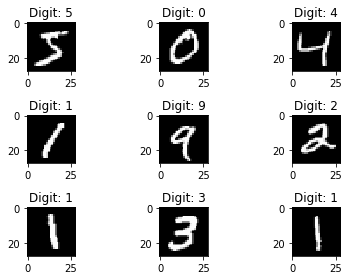

In [4]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  #Automatically adjust subplot parameters
  plt.tight_layout() 
  #Display data as an image, i.e., on a 2D regular raster
  plt.imshow(x_train[i],cmap='gray',interpolation='none') 
  plt.title(f"Digit: {y_train[i]}")

In [5]:
# let's print the shape before we reshape and normalize
print("x_train shape",x_train.shape)
print("y_train shape",y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


In [6]:
# building the input vector from the 28x28 pixels
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [7]:
# normalizing the data to help with the training
x_train /= 255
x_test /= 255

# print the final input shape ready for training
print("Train matrix shape", x_train.shape)
print("Test matrix shape", x_test.shape)

Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [8]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [9]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [10]:
# Y_train = y_train.reshape(-1,1)
# Y_test = y_test.reshape(-1,1)
# Y_train[0].shape

In [12]:
model = Sequential()
model.add(Dense(512,input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [13]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [14]:
history = model.fit(x_train,Y_train, batch_size=128,epochs=20, verbose=2, validation_data=(x_test,Y_test))

Epoch 1/20
469/469 - 2s - loss: 0.2491 - accuracy: 0.9255 - val_loss: 0.1123 - val_accuracy: 0.9647
Epoch 2/20
469/469 - 1s - loss: 0.1007 - accuracy: 0.9686 - val_loss: 0.0846 - val_accuracy: 0.9745
Epoch 3/20
469/469 - 1s - loss: 0.0719 - accuracy: 0.9774 - val_loss: 0.0736 - val_accuracy: 0.9758
Epoch 4/20
469/469 - 1s - loss: 0.0576 - accuracy: 0.9812 - val_loss: 0.0712 - val_accuracy: 0.9784
Epoch 5/20
469/469 - 1s - loss: 0.0442 - accuracy: 0.9860 - val_loss: 0.0637 - val_accuracy: 0.9795
Epoch 6/20
469/469 - 1s - loss: 0.0393 - accuracy: 0.9873 - val_loss: 0.0688 - val_accuracy: 0.9814
Epoch 7/20
469/469 - 1s - loss: 0.0335 - accuracy: 0.9889 - val_loss: 0.0603 - val_accuracy: 0.9826
Epoch 8/20
469/469 - 1s - loss: 0.0291 - accuracy: 0.9902 - val_loss: 0.0748 - val_accuracy: 0.9787
Epoch 9/20
469/469 - 1s - loss: 0.0280 - accuracy: 0.9905 - val_loss: 0.0604 - val_accuracy: 0.9846
Epoch 10/20
469/469 - 1s - loss: 0.0248 - accuracy: 0.9916 - val_loss: 0.0698 - val_accuracy: 0.9813

In [15]:
loss = model.evaluate(x_test,Y_test,verbose=2)
print(f'loss={loss[0]} \n accuracy = {loss[1]}')

313/313 - 1s - loss: 0.0764 - accuracy: 0.9825
loss=0.07635344564914703 
 accuracy = 0.9825000166893005



9825  classified correctly
175  classified incorrectly


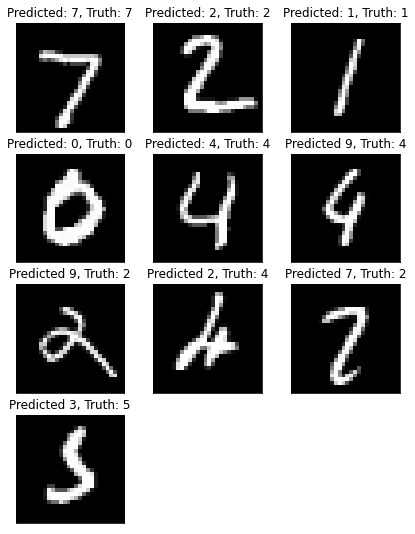

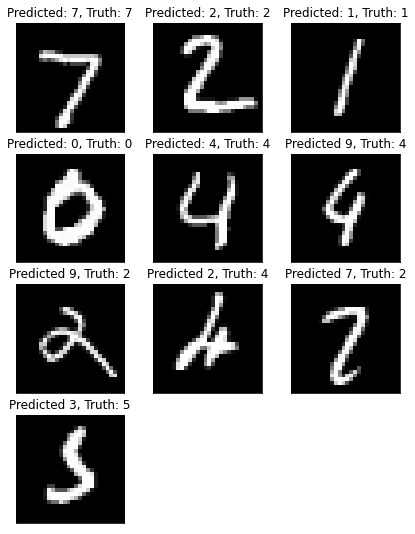

In [19]:
predicted_classes = model.predict_classes(x_test)
# see which we predicted correctly and which not
correct_idx = np.nonzero(predicted_classes == y_test)[0]
incorrect_idx = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_idx)," classified correctly")
print(len(incorrect_idx)," classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()
# print('Correct predictions')
# ploting 5 correct predictions
for i, correct in enumerate(correct_idx[:5]):
    plt.subplot(6,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],y_test[correct]))
    plt.xticks([])
    plt.yticks([])
# print('Incorrect predictions')
# plotloting 5 incorrect predictions
for i, incorrect in enumerate(incorrect_idx[:5]):
    plt.subplot(6,3,i+1+5)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

figure_evaluation